<a href="https://colab.research.google.com/github/zahran1234/machine-learning-/blob/main/Copy_of_Sentiment_Analysis_features_extraction_from_word2vec100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
from scipy import stats
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score ,classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from gensim.models import Word2Vec
import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from nltk.stem import ARLSTem
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from keras.utils import to_categorical



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

In [11]:
def get_accuracy_NN(name, trained_model , x_train, y_train, x_test, y_test,y_train_enc,y_test_enc):
  loss,acc=model.evaluate(x_test,y_test_enc)
  print("test loss :", loss)
  print('test accuracy:',acc*100)
  print("____________________________")
  loss,acc=model.evaluate(x_train,y_train_enc)
  print("trainig loss :", loss)
  print('trainig accuracy:',acc*100)
  print("____________________________")

  pred=model.predict(x_test)
  pred_list=[]
  for i in pred:
    pred_list.append(np.argmax(i))
  cf1 = confusion_matrix(y_test,pred_list)
  sns.heatmap(cf1,annot=True,fmt = '.0f')
  plt.xlabel('prediction')
  plt.ylabel('Actual')
  plt.title(name+ ' Confusion Matrix')
  plt.show()
  print("true")
  print(classification_report(y_test,pred_list  ))

In [12]:
df= pd.read_excel('/content/original_dataset.xlsx')

In [13]:
df=pd.DataFrame(df)

In [14]:
df.head()

Unnamed: 0                                 review_description  rating  \
0           0                         ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿ®ÿπÿØ ÿßŸÑÿ•ÿµÿØÿßÿ± ÿßŸÑÿ¨ÿØŸäÿØ      -1   
1           1                                  ÿßÿ®ŸÑŸÉŸäÿ¥ŸÜ ÿ≤ÿ®ÿßŸÑŸá ÿ®ÿ¨ÿØ      -1   
2           2                                 ÿ≥Ÿäÿ¶ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ      -1   
3           3  ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥Ÿàÿ£ ŸÉÿßŸÜ ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ Ÿàÿ≥ŸáŸÑ Ÿàÿ®ÿ≥Ÿäÿ∑ ÿß...      -1   
4           4                     ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿπŸÜÿØ ÿßŸÑŸÅÿ™ÿ≠      -1   

       company  
0  alahli_bank  
1  alahli_bank  
2  alahli_bank  
3  alahli_bank  
4  alahli_bank

In [15]:
print(df.shape)
df=df.dropna()
df=df.drop_duplicates()
print(df.shape)

(67127, 4)
(67125, 4)


# **data visualization**

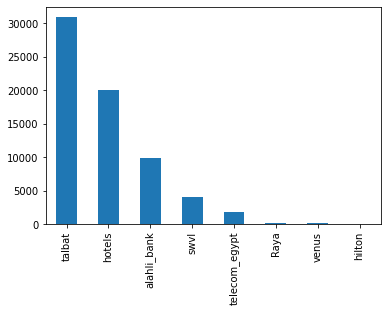

In [16]:
df.company.value_counts().plot(kind='bar')

In [17]:
fig = px.sunburst(df, path=['rating'],title= ' rating')
fig.update_traces(textinfo='label + percent parent')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



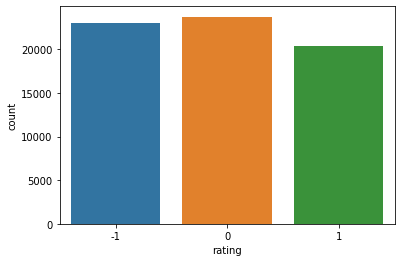

In [18]:
sns.countplot(df.rating)

In [19]:
fig = px.sunburst(df, path=['company', 'rating'],title= 'Relation between company and rating')
fig.update_traces(textinfo='label + percent parent')

In [20]:
emojis = {
    "üôÇ":"Ÿäÿ®ÿ™ÿ≥ŸÖ",
    "üòÇ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üíî":"ŸÇŸÑÿ® ÿ≠ÿ≤ŸäŸÜ",
    "üôÇ":"Ÿäÿ®ÿ™ÿ≥ŸÖ",
    "‚ù§Ô∏è":"ÿ≠ÿ®",
    "‚ù§":"ÿ≠ÿ®",
    "üòç":"ÿ≠ÿ®",
    "üò≠":"Ÿäÿ®ŸÉŸä",
    "üò¢":"ÿ≠ÿ≤ŸÜ",
    "üòî":"ÿ≠ÿ≤ŸÜ",
    "‚ô•":"ÿ≠ÿ®",
    "üíú":"ÿ≠ÿ®",
    "üòÖ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üôÅ":"ÿ≠ÿ≤ŸäŸÜ",
    "üíï":"ÿ≠ÿ®",
    "üíô":"ÿ≠ÿ®",
    "üòû":"ÿ≠ÿ≤ŸäŸÜ",
    "üòä":"ÿ≥ÿπÿßÿØÿ©",
    "üëè":"ŸäÿµŸÅŸÇ",
    "üëå":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "üò¥":"ŸäŸÜÿßŸÖ",
    "üòÄ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòå":"ÿ≠ÿ≤ŸäŸÜ",
    "üåπ":"Ÿàÿ±ÿØÿ©",
    "üôà":"ÿ≠ÿ®",
    "üòÑ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòê":"ŸÖÿ≠ÿßŸäÿØ",
    "‚úå":"ŸÖŸÜÿ™ÿµÿ±",
    "‚ú®":"ŸÜÿ¨ŸÖŸá",
    "ü§î":"ÿ™ŸÅŸÉŸäÿ±",
    "üòè":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üòí":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üôÑ":"ŸÖŸÑŸÑ",
    "üòï":"ÿπÿµÿ®Ÿäÿ©",
    "üòÉ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üå∏":"Ÿàÿ±ÿØÿ©",
    "üòì":"ÿ≠ÿ≤ŸÜ",
    "üíû":"ÿ≠ÿ®",
    "üíó":"ÿ≠ÿ®",
    "üòë":"ŸÖŸÜÿ≤ÿπÿ¨",
    "üí≠":"ÿ™ŸÅŸÉŸäÿ±",
    "üòé":"ÿ´ŸÇÿ©",
    "üíõ":"ÿ≠ÿ®",
    "üò©":"ÿ≠ÿ≤ŸäŸÜ",
    "üí™":"ÿπÿ∂ŸÑÿßÿ™",
    "üëç":"ŸÖŸàÿßŸÅŸÇ",
    "üôèüèª":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üò≥":"ŸÖÿµÿØŸàŸÖ",
    "üëèüèº":"ÿ™ÿµŸÅŸäŸÇ",
    "üé∂":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üåö":"ÿµŸÖÿ™",
    "üíö":"ÿ≠ÿ®",
    "üôè":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üíò":"ÿ≠ÿ®",
    "üçÉ":"ÿ≥ŸÑÿßŸÖ",
    "‚ò∫":"Ÿäÿ∂ÿ≠ŸÉ",
    "üê∏":"ÿ∂ŸÅÿØÿπ",
    "üò∂":"ŸÖÿµÿØŸàŸÖ",
    "‚úåÔ∏è":"ŸÖÿ±ÿ≠",
    "‚úãüèª":"ÿ™ŸàŸÇŸÅ",
    "üòâ":"ÿ∫ŸÖÿ≤ÿ©",
    "üå∑":"ÿ≠ÿ®",
    "üôÉ":"ŸÖÿ®ÿ™ÿ≥ŸÖ",
    "üò´":"ÿ≠ÿ≤ŸäŸÜ",
    "üò®":"ŸÖÿµÿØŸàŸÖ",
    "üéº ":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üçÅ":"ŸÖÿ±ÿ≠",
    "üçÇ":"ŸÖÿ±ÿ≠",
    "üíü":"ÿ≠ÿ®",
    "üò™":"ÿ≠ÿ≤ŸÜ",
    "üòÜ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üò£":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "‚ò∫Ô∏è":"ÿ≠ÿ®",
    "üò±":"ŸÉÿßÿ±ÿ´ÿ©",
    "üòÅ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòñ":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üèÉüèº":"Ÿäÿ¨ÿ±Ÿä",
    "üò°":"ÿ∫ÿ∂ÿ®",
    "üö∂":"Ÿäÿ≥Ÿäÿ±",
    "ü§ï":"ŸÖÿ±ÿ∂",
    "‚ÄºÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üïä":"ÿ∑ÿßÿ¶ÿ±",
    "üëåüèª":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚ù£":"ÿ≠ÿ®",
    "üôä":"ŸÖÿµÿØŸàŸÖ",
    "üíÉ":"ÿ≥ÿπÿßÿØÿ© ŸÖÿ±ÿ≠",
    "üíÉüèº":"ÿ≥ÿπÿßÿØÿ© ŸÖÿ±ÿ≠",
    "üòú":"ŸÖÿ±ÿ≠",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "üòü":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üíñ":"ÿ≠ÿ®",
    "üò•":"ÿ≠ÿ≤ŸÜ",
    "üéª":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚úí":"ŸäŸÉÿ™ÿ®",
    "üö∂üèª":"Ÿäÿ≥Ÿäÿ±",
    "üíé":"ÿßŸÑŸÖÿßÿ∏",
    "üò∑":"Ÿàÿ®ÿßÿ° ŸÖÿ±ÿ∂",
    "‚òù":"Ÿàÿßÿ≠ÿØ",
    "üö¨":"ÿ™ÿØÿÆŸäŸÜ",
    "üíê" : "Ÿàÿ±ÿØ",
    "üåû" : "ÿ¥ŸÖÿ≥",
    "üëÜ" : "ÿßŸÑÿßŸàŸÑ",
    "‚ö†Ô∏è" :"ÿ™ÿ≠ÿ∞Ÿäÿ±",
    "ü§ó" : "ÿßÿ≠ÿ™Ÿàÿßÿ°",
    "‚úñÔ∏è": "ÿ∫ŸÑÿ∑",
    "üìç"  : "ŸÖŸÉÿßŸÜ",
    "üë∏" : "ŸÖŸÑŸÉŸá",
    "üëë" : "ÿ™ÿßÿ¨",
    "‚úîÔ∏è" : "ÿµÿ≠",
    "üíå": "ŸÇŸÑÿ®",
    "üò≤" : "ŸÖŸÜÿØŸáÿ¥",
    "üí¶": "ŸÖÿßÿ°",
    "üö´" : "ÿÆÿ∑ÿß",
    "üëèüèª" : "ÿ®ÿ±ÿßŸÅŸà",
    "üèä" :"Ÿäÿ≥ÿ®ÿ≠",
    "üëçüèª": "ÿ™ŸÖÿßŸÖ",
    "‚≠ïÔ∏è" :"ÿØÿßÿ¶ÿ±Ÿá ŸÉÿ®Ÿäÿ±Ÿá",
    "üé∑" : "ÿ≥ÿßŸÉÿ≥ŸÅŸàŸÜ",
    "üëã": "ÿ™ŸÑŸàŸäÿ≠ ÿ®ÿßŸÑŸäÿØ",
    "‚úåüèº": "ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",
    "üåù":"ŸÖÿ®ÿ™ÿ≥ŸÖ",
    "‚ûø"  : "ÿπŸÇÿØŸá ŸÖÿ≤ÿØŸàÿ¨Ÿá",
    "üí™üèº" : "ŸÇŸàŸä",
    "üì©":  "ÿ™ŸàÿßÿµŸÑ ŸÖÿπŸä",
    "‚òïÔ∏è": "ŸÇŸáŸàŸá",
    "üòß" : "ŸÇŸÑŸÇ Ÿà ÿµÿØŸÖÿ©",
    "üó®": "ÿ±ÿ≥ÿßŸÑÿ©",   
    "‚ùóÔ∏è" :"ÿ™ÿπÿ¨ÿ®",
    "üôÜüèª": "ÿßÿ¥ÿßÿ±Ÿá ŸÖŸàÿßŸÅŸÇŸá",
    "üëØ" :"ÿßÿÆŸàÿßÿ™",
    "¬©" :  "ÿ±ŸÖÿ≤",
    "üëµüèΩ" :"ÿ≥ŸäÿØŸá ÿπÿ¨Ÿàÿ≤Ÿá",
    "üê£": "ŸÉÿ™ŸÉŸàÿ™",  
    "üôå": "ÿ™ÿ¥ÿ¨Ÿäÿπ",
    "üôá": "ÿ¥ÿÆÿµ ŸäŸÜÿ≠ŸÜŸä",
    "üëêüèΩ":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",    
    "üëåüèΩ": "ÿ®ÿßŸÑÿ∏ÿ®ÿ∑",
    "‚ÅâÔ∏è" : "ÿßÿ≥ÿ™ŸÜŸÉÿßÿ±",
    "‚öΩÔ∏è": "ŸÉŸàÿ±Ÿá",
    "üï∂" :"ÿ≠ÿ®",
    "üéà" :"ÿ®ÿßŸÑŸàŸÜ",    
    "üéÄ":    "Ÿàÿ±ÿØŸá",
    "üíµ":  "ŸÅŸÑŸàÿ≥",   
    "üòã":  "ÿ¨ÿßÿ¶ÿπ",
    "üòõ":  "Ÿäÿ∫Ÿäÿ∏",
    "üò†":  "ÿ∫ÿßÿ∂ÿ®",
    "‚úçüèª":  "ŸäŸÉÿ™ÿ®",
    "üåæ":  "ÿßÿ±ÿ≤",
    "üë£":  "ÿßÿ´ÿ± ŸÇÿØŸÖŸäŸÜ",
    "‚ùå":"ÿ±ŸÅÿ∂",
    "üçü":"ÿ∑ÿπÿßŸÖ",
    "üë¨":"ÿµÿØÿßŸÇÿ©",
    "üê∞":"ÿßÿ±ŸÜÿ®",
    "‚òÇ":"ŸÖÿ∑ÿ±",
    "‚öú":"ŸÖŸÖŸÑŸÉÿ© ŸÅÿ±ŸÜÿ≥ÿß",
    "üêë":"ÿÆÿ±ŸàŸÅ",
    "üó£":"ÿµŸàÿ™ ŸÖÿ±ÿ™ŸÅÿπ",
    "üëåüèº":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚òò":"ŸÖÿ±ÿ≠",
    "üòÆ":"ÿµÿØŸÖÿ©",
    "üò¶":"ŸÇŸÑŸÇ",
    "‚≠ï":"ÿßŸÑÿ≠ŸÇ",
    "‚úèÔ∏è":"ŸÇŸÑŸÖ",
    "‚Ñπ":"ŸÖÿπŸÑŸàŸÖÿßÿ™",
    "üôçüèª":"ÿ±ŸÅÿ∂",
    "‚ö™Ô∏è":"ŸÜÿ∂ÿßÿ±ÿ© ŸÜŸÇÿßÿ°",
    "üê§":"ÿ≠ÿ≤ŸÜ",
    "üí´":"ŸÖÿ±ÿ≠",
    "üíù":"ÿ≠ÿ®",
    "üçî":"ÿ∑ÿπÿßŸÖ",
    "‚ù§Ô∏é":"ÿ≠ÿ®",
    "‚úàÔ∏è":"ÿ≥ŸÅÿ±",
    "üèÉüèª‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üç≥":"ÿ∞ŸÉÿ±",
    "üé§":"ŸÖÿßŸäŸÉ ÿ∫ŸÜÿßÿ°",
    "üéæ":"ŸÉÿ±Ÿá",
    "üêî":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üôã":"ÿ≥ÿ§ÿßŸÑ",
    "üìÆ":"ÿ®ÿ≠ÿ±",
    "üíâ":"ÿØŸàÿßÿ°",
    "üôèüèº":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üíÇüèø ":"ÿ≠ÿßÿ±ÿ≥",
    "üé¨":"ÿ≥ŸäŸÜŸÖÿß",
    "‚ô¶Ô∏è":"ŸÖÿ±ÿ≠",
    "üí°":"ŸÇŸÉÿ±ÿ©",
    "‚Äº":"ÿ™ÿπÿ¨ÿ®",
    "üëº":"ÿ∑ŸÅŸÑ",
    "üîë":"ŸÖŸÅÿ™ÿßÿ≠",
    "‚ô•Ô∏è":"ÿ≠ÿ®",
    "üïã":"ŸÉÿπÿ®ÿ©",
    "üêì":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üí©":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üëΩ":"ŸÅÿ∂ÿßÿ¶Ÿä",
    "‚òîÔ∏è":"ŸÖÿ∑ÿ±",
    "üç∑":"ÿπÿµŸäÿ±",
    "üåü":"ŸÜÿ¨ŸÖÿ©",
    "‚òÅÔ∏è":"ÿ≥ÿ≠ÿ®",
    "üëÉ":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üå∫":"ŸÖÿ±ÿ≠",
    "üî™":"ÿ≥ŸÉŸäŸÜÿ©",
    "‚ô®":"ÿ≥ÿÆŸàŸÜŸäÿ©",
    "üëäüèº":"ÿ∂ÿ±ÿ®",
    "‚úè":"ŸÇŸÑŸÖ",
    "üö∂üèæ‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "‚óæÔ∏è":"ŸàŸÇŸÅ",
    "üòö":"ÿ≠ÿ®",
    "üî∏":"ŸÖÿ±ÿ≠",
    "üëéüèª":"ŸÑÿß Ÿäÿπÿ¨ÿ®ŸÜŸä",
    "üëäüèΩ":"ÿ∂ÿ±ÿ®ÿ©",
    "üòô":"ÿ≠ÿ®",
    "üé•":"ÿ™ÿµŸàŸäÿ±",
    "üëâ":"ÿ¨ÿ∞ÿ® ÿßŸÜÿ™ÿ®ÿßŸá",
    "üëèüèΩ":"ŸäÿµŸÅŸÇ",
    "üí™üèª":"ÿπÿ∂ŸÑÿßÿ™",
    "üè¥":"ÿßÿ≥ŸàÿØ",
    "üî•":"ÿ≠ÿ±ŸäŸÇ",  
    "üò¨":"ÿπÿØŸÖ ÿßŸÑÿ±ÿßÿ≠ÿ©",   
    "üëäüèø":"Ÿäÿ∂ÿ±ÿ®",    
    "üåø":"Ÿàÿ±ŸÇŸá ÿ¥ÿ¨ÿ±Ÿá",     
    "‚úãüèº":"ŸÉŸÅ ÿßŸäÿØ",    
    "üëê":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",      
    "‚ò†Ô∏è":"Ÿàÿ¨Ÿá ŸÖÿ±ÿπÿ®",     
    "üéâ":"ŸäŸáŸÜÿ¶",      
    "üîï" :"ÿµÿßŸÖÿ™",
    "üòø":"Ÿàÿ¨Ÿá ÿ≠ÿ≤ŸäŸÜ",      
    "‚òπÔ∏è":"Ÿàÿ¨Ÿá Ÿäÿßÿ¶ÿ≥",     
    "üòò" :"ÿ≠ÿ®",     
    "üò∞" :"ÿÆŸàŸÅ Ÿà ÿ≠ÿ≤ŸÜ",
    "üåº":"Ÿàÿ±ÿØŸá",      
    "üíã":  "ÿ®Ÿàÿ≥Ÿá",
    "üëá":"ŸÑÿßÿ≥ŸÅŸÑ",     
    "‚ù£Ô∏è":"ÿ≠ÿ®",     
    "üéß":"ÿ≥ŸÖÿßÿπÿßÿ™",
    "üìù":"ŸäŸÉÿ™ÿ®",      
    "üòá":"ÿØÿßŸäÿÆ",      
    "üòà":"ÿ±ÿπÿ®",      
    "üèÉ":"Ÿäÿ¨ÿ±Ÿä",      
    "‚úåüèª":"ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",    
    "üî´":"Ÿäÿ∂ÿ±ÿ®",      
    "‚ùóÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üëé":"ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ",      
    "üîê":"ŸÇŸÅŸÑ",      
    "üëà":"ŸÑŸÑŸäŸÖŸäŸÜ",
    "‚Ñ¢":"ÿ±ŸÖÿ≤",    
    "üö∂üèΩ":"Ÿäÿ™ŸÖÿ¥Ÿä",    
    "üòØ":"ŸÖÿ™ŸÅÿßÿ¨ÿ£",  
    "‚úä":"ŸäÿØ ŸÖÿ∫ŸÑŸÇŸá",    
    "üòª":"ÿßÿπÿ¨ÿßÿ®",    
    "üôâ" :"ŸÇÿ±ÿØ",    
    "üëß":"ÿ∑ŸÅŸÑŸá ÿµÿ∫Ÿäÿ±Ÿá",     
    "üî¥":"ÿØÿßÿ¶ÿ±Ÿá ÿ≠ŸÖÿ±ÿßÿ°",      
    "üí™üèΩ":"ŸÇŸàŸá",     
    "üí§":"ŸäŸÜÿßŸÖ",     
    "üëÄ":"ŸäŸÜÿ∏ÿ±",     
    "‚úçüèª":"ŸäŸÉÿ™ÿ®",  
    "‚ùÑÔ∏è":"ÿ™ŸÑÿ¨",
    "üíÄ":"ÿ±ÿπÿ®",   
    "üò§":"Ÿàÿ¨Ÿá ÿπÿßÿ®ÿ≥",      
    "üñã":"ŸÇŸÑŸÖ",      
    "üé©":"ŸÉÿßÿ®",      
    "‚òïÔ∏è":"ŸÇŸáŸàŸá",     
    "üòπ":"ÿ∂ÿ≠ŸÉ",     
    "üíì":"ÿ≠ÿ®",      
    "‚òÑÔ∏è ":"ŸÜÿßÿ±",     
    "üëª":"ÿ±ÿπÿ®",
    "‚ùé":"ÿÆÿ∑ÿ°",
    "ü§Æ":"ÿ≠ÿ≤ŸÜ",
    'üèª':"ÿßÿ≠ŸÖÿ±"
    }

emoticons_to_emoji = {
    ":)" : "üôÇ",
    ":(" : "üôÅ",
    "xD" : "üòÜ",
    ":=(": "üò≠",
    ":'(": "üò¢",
    ":'‚Äë(": "üò¢",
    "XD" : "üòÇ",
    ":D" : "üôÇ",
    "‚ô¨" : "ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚ô°" : "‚ù§",
    "‚òª"  : "üôÇ",
    }

# **data cleaning**

In [21]:
def del_digits_and_pun(value,pun):
    new_value= re.sub('[1-9]','',value)
    for i in pun:
        new_value=new_value.replace(i,' ')
    return new_value

In [22]:
def tokens_review(x,stop_words):
    x=str(x)
    words=word_tokenize(x)
    new_words=[]
    for i in words:
        text = re.sub(r'[^ÿ°-Ÿä ]',' ',i)
        
        if text not in stop_words:
            new_words.append(text)
    return new_words

In [23]:
def remove_diacritics(text):
        arabic_diacritics = re.compile(""" Ÿë    | # Tashdid
                             Ÿé    | # Fatha
                             Ÿã    | # Tanwin Fath
                             Ÿè    | # Damma
                             Ÿå    | # Tanwin Damm
                             Ÿê    | # Kasra
                             Ÿç    | # Tanwin Kasr
                             Ÿí    | # Sukun
                             ŸÄ     # Tatwil/Kashida
                         """, re.VERBOSE)
        text = re.sub(arabic_diacritics, '', str(text))
        return text 

In [24]:
def hendle_emojis(text,emojis):
  li=[]
  for i in word_tokenize(text):
    for x in i :
      if x not in emojis.keys():
        li.append(i)
        break
      else:
        li.append(emojis[x])
  return " ".join(li)
        

delete english punctuations and arabic punctuations from our reviews

In [25]:
hendle_emojis("üòÇüòÇüòÇ", emojis)

'Ÿäÿ∂ÿ≠ŸÉ Ÿäÿ∂ÿ≠ŸÉ Ÿäÿ∂ÿ≠ŸÉ'

In [26]:
arabic_punctuations = """
`√∑√óÿõÿå.<>_()*&^%][ŸÄÿå/:ÿü.,'{}~¬¶+|!‚Äù‚Ä¶‚Äú‚Äì#.ŸÄ
"""

english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations
punctuations_list
list_pun=[i for i in punctuations_list]


df.review_description=df.review_description.apply(del_digits_and_pun,args=[list_pun])



# ** staming  reviwe**

In [27]:
def preprossing (review):
  words=word_tokenize(review)
  new_words=[]
  stop_words=stopwords.words('arabic')
  stop_words.remove('ŸÑÿß')
  stop_words.remove('ŸÑŸÉŸÜ')
  stop_words.remove('ŸàŸÑŸÉŸÜ')
  stop_words.remove('ŸàÿßŸà')
  stop_words.remove('ÿ£ÿ∑ÿπŸÖ')
  stop_words.remove('ÿ£ŸÅ')
  stop_words.append('ÿ∑ŸÑÿ®ÿßÿ™')
  stop_words.append('ÿ¥ÿ±ŸÉŸá')
  stop_words.append('ÿ®ÿ±ŸÜÿßŸÖÿ¨')
  stop_words.append('ÿ™ÿ∑ÿ®ŸäŸÇ')
  for i in words:
    stemmer = ARLSTem()
    word = stemmer.stem(i)
    if i in stop_words:
      continue 
    new_words.append(word)

  return " ".join(new_words)




In [28]:
import nltk

df['clean']=df.review_description.apply(preprossing)
df['clean']=df.clean.apply(hendle_emojis,args=[emojis])



In [29]:
df.head()

Unnamed: 0                                 review_description  rating  \
0           0                         ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿ®ÿπÿØ ÿßŸÑÿ•ÿµÿØÿßÿ± ÿßŸÑÿ¨ÿØŸäÿØ      -1   
1           1                                  ÿßÿ®ŸÑŸÉŸäÿ¥ŸÜ ÿ≤ÿ®ÿßŸÑŸá ÿ®ÿ¨ÿØ      -1   
2           2                                 ÿ≥Ÿäÿ¶ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ      -1   
3           3  ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥Ÿàÿ£ ŸÉÿßŸÜ ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ Ÿàÿ≥ŸáŸÑ Ÿàÿ®ÿ≥Ÿäÿ∑ ÿß...      -1   
4           4                     ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿπŸÜÿØ ÿßŸÑŸÅÿ™ÿ≠      -1   

       company                                              clean  
0  alahli_bank                                   ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿµÿØÿ± ÿ¨ÿØŸäÿØ  
1  alahli_bank                                     ÿ®ŸÑŸÉŸäÿ¥ ÿ≤ÿ®ÿßŸÑ ÿ®ÿ¨ÿØ  
2  alahli_bank                                   ÿ≥Ÿäÿ¶ ÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ  
3  alahli_bank  ÿßÿ≥ŸÅ ÿ™ÿ∑ÿ®ŸäŸÇ ÿßÿ≥Ÿàÿß ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ ÿ≥ŸáŸÑ ÿ®ÿ≥Ÿäÿ∑ ŸÖÿπŸÇÿØ ŸÅÿ™ÿ≠ ŸÖÿπÿß ...  
4  alahli_bank                             ÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ŸÅÿ™ÿ≠

In [30]:
x=df['clean'].tolist()
x[:10]

['ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿµÿØÿ± ÿ¨ÿØŸäÿØ',
 'ÿ®ŸÑŸÉŸäÿ¥ ÿ≤ÿ®ÿßŸÑ ÿ®ÿ¨ÿØ',
 'ÿ≥Ÿäÿ¶ ÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ',
 'ÿßÿ≥ŸÅ ÿ™ÿ∑ÿ®ŸäŸÇ ÿßÿ≥Ÿàÿß ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ ÿ≥ŸáŸÑ ÿ®ÿ≥Ÿäÿ∑ ŸÖÿπŸÇÿØ ŸÅÿ™ÿ≠ ŸÖÿπÿß ÿ®ÿ≥ŸáŸàŸÑ ÿ™ÿ¨ÿØ ÿÆÿØŸÖ ŸÖÿ™ÿßÿ≠',
 'ÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ŸÅÿ™ÿ≠',
 'ŸÖÿ±ÿ±ÿ±ÿ± ÿ≤ŸÇ ÿßÿÆÿ± ÿ≠ÿØŸäÿ´ ŸÅÿ™ÿ≠ŸÑŸä ÿßÿ®ÿØ ÿ±ŸÅÿ∂ ÿßŸä ŸÉŸÑŸÖ ŸÖÿ±Ÿàÿ± ŸÉÿ™ÿ® ÿßŸà ÿ±ŸÇŸÖ ÿ®ÿ∑ÿßŸÇ ÿßŸáŸÑŸä ÿÆÿ±ÿ®ÿ™ ÿ∫ŸÑÿ® ŸÜÿßÿ≥ ŸÉÿßŸÜ ŸÖÿπÿ™ŸÖÿØ ÿßÿ≥ŸÅ',
 'ÿ™ÿ∑ÿ®ŸäŸÇ ÿ¥ÿ™ÿ∫ŸÑ ÿπŸÖŸÑ ÿ≥ÿ¨ŸäŸÑ ÿØÿÆŸàŸÑ ÿ≠ÿ≥ÿßÿ®Ÿä ŸÅÿ™ÿ≠ ÿ¥ŸàŸÅŸà ÿ≠ŸÑ ÿßŸÜÿß ŸÖÿπÿ∑ŸÑ',
 'ÿßÿ∞ÿß ŸÇŸÖÿ™ ÿ®ŸÅÿ™ÿ≠ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ∑ŸÑÿ® ÿ≠ÿØŸäÿ´ ÿßÿ∞ÿß ÿ∂ÿ∫ÿ∑ ÿ™ÿ≠ÿØŸäÿ´ ŸÇÿ®ŸÑ ÿ™ÿ≠ÿØŸäÿ´ ŸÑÿßŸáŸà ŸÑŸÑŸä ŸÅÿ™ÿ≠ ŸÑÿßŸáŸà ŸÑŸÑŸä ÿ≠ÿØÿ´ Ÿàÿ¥ ŸÖÿ¥ŸÉŸÑ',
 'ÿßÿ≥ŸÅ ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿßŸÖÿ≥ ÿßÿ≠ŸàŸÑ ÿ≥ÿ™ÿÆÿØŸÖ ŸÖÿßŸÅŸä ÿßÿ™ŸàÿßÿµŸÑ ÿÆÿØŸÖ ÿπŸÖŸÑÿßÿ° ŸÇÿßŸÑ ÿ≠ÿ∞ŸÅ ŸÜÿ≤ŸÑ ÿ¨ÿØŸäÿØ ŸäŸÖŸÉ ŸäŸÉŸà ÿ≠ÿØŸäÿ´ ŸÜŸÅÿ≥ ŸÖÿ¥ŸÉŸÑ ŸÖÿßÿßŸÜÿ≠ŸÑ',
 'ÿµÿ±ÿßÿ≠ ÿ¥Ÿä ŸÖŸàÿ≥ŸÅ']

In [31]:
tfidfconverter= TfidfVectorizer(max_features=1000,ngram_range=(1,3))
X_Vec = tfidfconverter.fit_transform(x)
X_Vec = pd.DataFrame.sparse.from_spmatrix(X_Vec)
Y=df["rating"]


Testing accuracy   : 86.15040953090097 %
MSE [TEST]          : 0.33730454206999255
Training accuracy  : 85.68757410841872 %
MSE [TRAIN]         : 0.3402298501109726
precision :  0.8615040953090097
recall    :  0.8615040953090097
f1_score  :  0.8615040953090097


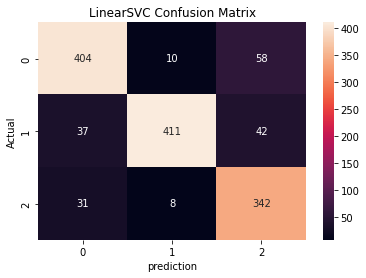

              precision    recall  f1-score   support

          -1       0.86      0.86      0.86     22563
           0       0.95      0.82      0.88     23261
           1       0.78      0.89      0.83     19958

    accuracy                           0.86     65782
   macro avg       0.86      0.86      0.86     65782
weighted avg       0.86      0.86      0.86     65782

              precision    recall  f1-score   support

          -1       0.86      0.86      0.86       472
           0       0.96      0.84      0.89       490
           1       0.77      0.90      0.83       381

    accuracy                           0.86      1343
   macro avg       0.86      0.86      0.86      1343
weighted avg       0.87      0.86      0.86      1343



In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_Vec,Y,random_state=42,test_size=0.02,shuffle=True)
from sklearn.svm import LinearSVC
trained_clf_svc = LinearSVC().fit(x_train, y_train)
get_accuracy('LinearSVC',trained_clf_svc,x_train, y_train, x_test, y_test)


# **features extraction  word2vec**

In [33]:
from gensim.models import Word2Vec
sents=[]
dim_num=100
for i in df.clean:
  sents.append(word_tokenize(i))
model=Word2Vec(sentences=sents, window=5, min_count=1, workers=4,size=dim_num)

In [34]:
X=np.zeros((dim_num,), dtype=float)

for i in (df.clean):
  counter=0
  sum=np.zeros((100,), dtype=float)
  for x in word_tokenize(i) :
    sum+=model.wv[x]
    counter+=1
  if counter==0 :
    X=np.vstack((X,sum))
  else:
    X=np.vstack((X,sum/counter))
X= np.delete(X, (0), axis=0)
y=df.rating 
X.shape

  

(67125, 100)

**# get X and y**

In [36]:
from sklearn.model_selection import train_test_split

def encod(x):
  if x==-1:
    return 0
  if x== 0:
    return 1
  return 2
y=df.rating
y=y.apply(encod)
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.02,shuffle=True)
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_test_enc=tf.keras.utils.to_categorical(y_test)


# **LinearSVC**

In [37]:

from sklearn.svm import LinearSVC
trained_clf_svc = LinearSVC().fit(x_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Testing accuracy   : 81.16157855547283 %
MSE [TEST]          : 0.387192851824274
Training accuracy  : 81.40676780882308 %
MSE [TRAIN]         : 0.3702684624973397
precision :  0.8116157855547282
recall    :  0.8116157855547282
f1_score  :  0.8116157855547282


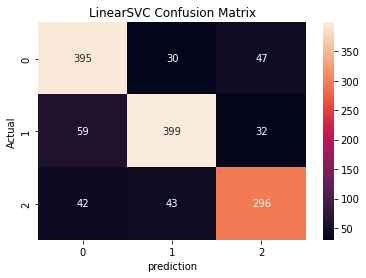

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     22563
           1       0.84      0.81      0.82     23261
           2       0.79      0.80      0.79     19958

    accuracy                           0.81     65782
   macro avg       0.81      0.81      0.81     65782
weighted avg       0.81      0.81      0.81     65782

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       472
           1       0.85      0.81      0.83       490
           2       0.79      0.78      0.78       381

    accuracy                           0.81      1343
   macro avg       0.81      0.81      0.81      1343
weighted avg       0.81      0.81      0.81      1343



In [38]:
get_accuracy('LinearSVC',trained_clf_svc,x_train, y_train, x_test, y_test)

# **apply decision tree model**

Testing accuracy   : 77.73641102010424 %
MSE [TEST]          : 0.4973938942665674
Training accuracy  : 78.40138639749476 %
MSE [TRAIN]         : 0.4598370374874586
precision :  0.7773641102010425
recall    :  0.7773641102010425
f1_score  :  0.7773641102010425


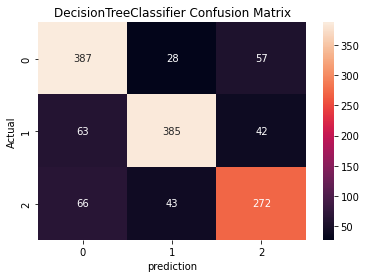

              precision    recall  f1-score   support

           0       0.77      0.82      0.79     22563
           1       0.84      0.77      0.80     23261
           2       0.74      0.77      0.76     19958

    accuracy                           0.78     65782
   macro avg       0.78      0.78      0.78     65782
weighted avg       0.79      0.78      0.78     65782

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       472
           1       0.84      0.79      0.81       490
           2       0.73      0.71      0.72       381

    accuracy                           0.78      1343
   macro avg       0.78      0.77      0.77      1343
weighted avg       0.78      0.78      0.78      1343



In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split= 2).fit(x_train,y_train)
get_accuracy('DecisionTreeClassifier',clf,x_train, y_train, x_test, y_test)


# **random forest model**

Testing accuracy   : 83.99106478034251 %
MSE [TEST]          : 0.3678332092330603
Training accuracy  : 84.57632787084613 %
MSE [TRAIN]         : 0.353440150801131
precision :  0.8399106478034252
recall    :  0.8399106478034252
f1_score  :  0.8399106478034252


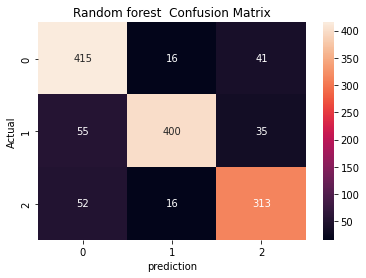

              precision    recall  f1-score   support

           0       0.80      0.90      0.85     22563
           1       0.93      0.81      0.87     23261
           2       0.81      0.83      0.82     19958

    accuracy                           0.85     65782
   macro avg       0.85      0.85      0.85     65782
weighted avg       0.85      0.85      0.85     65782

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       472
           1       0.93      0.82      0.87       490
           2       0.80      0.82      0.81       381

    accuracy                           0.84      1343
   macro avg       0.84      0.84      0.84      1343
weighted avg       0.85      0.84      0.84      1343



In [40]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=9,min_samples_leaf=5,min_samples_split=3).fit(x_train,y_train)
get_accuracy('Random forest ',model,x_train, y_train, x_test, y_test)


# **model 1 neural network**

In [41]:

model=Sequential()
model.add(Dense( 64 ,input_shape=(100,),activation='relu' ))
model.add(Dense(32, activation='relu',kernel_regularizer='l1'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy' ,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 9,123
Trainable params: 9,123
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(x_train,y_train_enc,batch_size=256 ,epochs=150)


Epoch 1/150
257/257 [==============================] - 2s 3ms/step - loss: 1.6146 - accuracy: 0.7777
Epoch 2/150
257/257 [==============================] - 1s 3ms/step - loss: 0.6346 - accuracy: 0.8103
Epoch 3/150
257/257 [==============================] - 1s 3ms/step - loss: 0.5748 - accuracy: 0.8173
Epoch 4/150
257/257 [==============================] - 1s 3ms/step - loss: 0.5483 - accuracy: 0.8221
Epoch 5/150
257/257 [==============================] - 1s 3ms/step - loss: 0.5292 - accuracy: 0.8255
Epoch 6/150
257/257 [==============================] - 1s 3ms/step - loss: 0.5160 - accuracy: 0.8286
Epoch 7/150
257/257 [==============================] - 1s 3ms/step - loss: 0.5064 - accuracy: 0.8295
Epoch 8/150
257/257 [==============================] - 1s 3ms/step - loss: 0.4982 - accuracy: 0.8310
Epoch 9/150
257/257 [==============================] - 1s 3ms/step - loss: 0.4917 - accuracy: 0.8324
Epoch 10/150
257/257 [==============================] - 1s 3ms/step - loss: 0.4863 - accura

42/42 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8608
test loss : 0.4032002091407776
test accuracy: 86.07594966888428
____________________________
2056/2056 [==============================] - 3s 2ms/step - loss: 0.3984 - accuracy: 0.8574
trainig loss : 0.3984215557575226
trainig accuracy: 85.73774099349976
____________________________
42/42 [==============================] - 0s 2ms/step


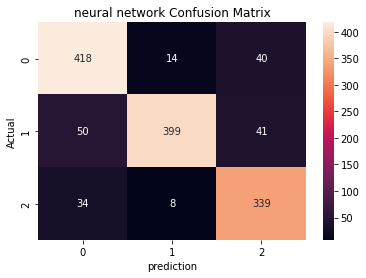

true
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       472
           1       0.95      0.81      0.88       490
           2       0.81      0.89      0.85       381

    accuracy                           0.86      1343
   macro avg       0.86      0.86      0.86      1343
weighted avg       0.87      0.86      0.86      1343



In [43]:
get_accuracy_NN("neural network",model,x_train,y_train,x_test,y_test,y_train_enc,y_test_enc)

# ***model 2 neural ntework***

In [44]:

model=Sequential()
model.add(Dense( 120,input_shape=(100,),activation='relu' ))

model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


model.compile(optimizer = 'adam' ,loss = 'categorical_crossentropy' ,metrics=['accuracy'])



Epoch 1/50
257/257 [==============================] - 2s 4ms/step - loss: 0.5336 - accuracy: 0.8027
Epoch 2/50
257/257 [==============================] - 1s 4ms/step - loss: 0.4397 - accuracy: 0.8364
Epoch 3/50
257/257 [==============================] - 1s 4ms/step - loss: 0.4231 - accuracy: 0.8412
Epoch 4/50
257/257 [==============================] - 1s 4ms/step - loss: 0.4139 - accuracy: 0.8434
Epoch 5/50
257/257 [==============================] - 1s 4ms/step - loss: 0.4056 - accuracy: 0.8461
Epoch 6/50
257/257 [==============================] - 1s 4ms/step - loss: 0.4007 - accuracy: 0.8487
Epoch 7/50
257/257 [==============================] - 1s 4ms/step - loss: 0.3961 - accuracy: 0.8497
Epoch 8/50
257/257 [==============================] - 1s 4ms/step - loss: 0.3913 - accuracy: 0.8513
Epoch 9/50
257/257 [==============================] - 1s 4ms/step - loss: 0.3891 - accuracy: 0.8521
Epoch 10/50
257/257 [==============================] - 1s 4ms/step - loss: 0.3851 - accuracy: 0.8535

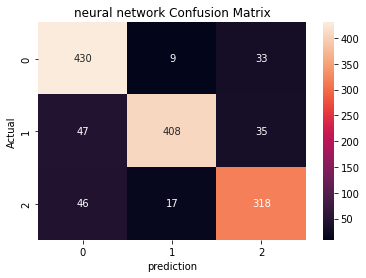

true
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       472
           1       0.94      0.83      0.88       490
           2       0.82      0.83      0.83       381

    accuracy                           0.86      1343
   macro avg       0.86      0.86      0.86      1343
weighted avg       0.87      0.86      0.86      1343



In [45]:
model.fit(x_train,y_train_enc,batch_size=256 ,epochs=50)
get_accuracy_NN("neural network",model,x_train,y_train,x_test,y_test,y_train_enc,y_test_enc)

CNN

In [46]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten
# Instantiate your model as usual
model = Sequential()
model.add(Conv2D(
                 filters=64,  
                 kernel_size=2,              
                 input_shape=(10,10,1),     
                 activation='relu')
)

model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(16, activation='relu'))
# End this multiclass model with 3 outputs and softmax
model.add(Dense(3, activation='softmax'))

model.summary ()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 64)          320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           4616      
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                25152     
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 3)                 51        
                                                                 
Total params: 31,179
Trainable params: 31,179
Non-trai

In [47]:
model.compile(optimizer = 'adam' ,loss = 'categorical_crossentropy' ,metrics=['accuracy'])
model.fit(x_train.reshape(-1,10,10,1),y_train_enc,batch_size=256 ,epochs=70)

Epoch 1/70
257/257 [==============================] - 17s 62ms/step - loss: 0.5527 - accuracy: 0.7938
Epoch 2/70
257/257 [==============================] - 15s 57ms/step - loss: 0.4517 - accuracy: 0.8305
Epoch 3/70
257/257 [==============================] - 15s 57ms/step - loss: 0.4343 - accuracy: 0.8354
Epoch 4/70
257/257 [==============================] - 15s 57ms/step - loss: 0.4227 - accuracy: 0.8395
Epoch 5/70
257/257 [==============================] - 15s 57ms/step - loss: 0.4179 - accuracy: 0.8412
Epoch 6/70
257/257 [==============================] - 15s 57ms/step - loss: 0.4130 - accuracy: 0.8434
Epoch 7/70
257/257 [==============================] - 15s 57ms/step - loss: 0.4090 - accuracy: 0.8438
Epoch 8/70
257/257 [==============================] - 15s 57ms/step - loss: 0.4035 - accuracy: 0.8450
Epoch 9/70
257/257 [==============================] - 15s 58ms/step - loss: 0.3994 - accuracy: 0.8476
Epoch 10/70
257/257 [==============================] - 15s 59ms/step - loss: 0.397

In [48]:

pred=model.predict(x_test.reshape(-1,10,10,1))
pred_list=[]
for i in pred:
  pred_list.append(np.argmax(i))
from sklearn.metrics import accuracy_score
print("test accuracy : ", accuracy_score(y_test,pred_list)*100)
print("_______________________")
print(classification_report(y_test,pred_list  ))
print("confusion  matrix")
print(confusion_matrix(pred_list, y_test))

42/42 [==============================] - 0s 3ms/step
test accuracy :  84.88458674609085
_______________________
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       472
           1       0.89      0.85      0.87       490
           2       0.81      0.83      0.82       381

    accuracy                           0.85      1343
   macro avg       0.85      0.85      0.85      1343
weighted avg       0.85      0.85      0.85      1343

confusion  matrix
[[407  38  37]
 [ 24 417  28]
 [ 41  35 316]]
